In [30]:
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
X_train= p.read_csv('in_chemico_x_train.csv')
X_test= p.read_csv('in_chemico_x_test.csv')
y_train = p.read_csv('in_chemico_y_train.csv')
y_test = p.read_csv('in_chemico_y_test.csv')

# Lasso 

In [ ]:
C_values = [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]
results = []

for C in C_values:
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('lasso', LogisticRegression(
            penalty='l1',
            solver='liblinear',
            C=C,
            random_state=42,
            max_iter=5000
        ))
    ])
    pipe.fit(X_train, y_train)
    coef = pipe.named_steps['lasso'].coef_.ravel()
    nonzero = (coef != 0).sum()
    results.append((C, nonzero))
    print(f"C={C:<6}  non-zero features = {nonzero}")

c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

C=0.0001  non-zero features = 0
C=0.001   non-zero features = 0
C=0.01    non-zero features = 0
C=0.05    non-zero features = 4
C=0.1     non-zero features = 8
C=0.2     non-zero features = 17
C=0.5     non-zero features = 37
C=1       non-zero features = 45
C=2       non-zero features = 60
C=5       non-zero features = 61
C=10      non-zero features = 62


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
lasso_selector = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LogisticRegression(
        penalty='l1',
        solver='liblinear',
        C=0.5,
        random_state=42,
        max_iter=5000
    ))
])

lasso_selector.fit(X_train, y_train)

coefs = np.abs(lasso_selector.named_steps['lasso'].coef_.ravel())
nonzero_idx = np.where(coefs != 0)[0]

print("Selected features:", len(nonzero_idx))
print("Indices:", nonzero_idx)
print("Values:", coefs[nonzero_idx])

nonzero_coefs = coefs[nonzero_idx]
sorted_nonzero = nonzero_idx[np.argsort(nonzero_coefs)[::-1]]
max_k = len(sorted_nonzero)


Selected features: 37
Indices: [  0   1   2  17  21  24  26  41  49  50  52  53  55  56  57  61  65  66
  67  68  74  80  81  82  83  93  97  98 105 109 121 122 126 129 131 132
 133]
Values: [0.01802142 0.07540877 0.1098708  0.04886081 0.21645569 0.45050368
 0.16228106 0.07252925 0.09458752 0.04584333 0.29740271 0.30646693
 0.00337946 0.26779672 0.0931045  0.33766515 0.05170757 0.08541258
 0.54463725 0.12316348 0.47977615 0.01200234 0.09235611 0.42374373
 0.30206786 0.37806123 0.61543891 0.07650596 0.24175022 0.08441292
 0.06029183 0.03805061 0.04623999 0.22445877 0.42540665 0.13664613
 0.21932389]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
feature_names = X_train.columns

top_20_idx = sorted_nonzero[:20]
top_20_names = feature_names[top_20_idx]

print("Top 20 LASSO features:")
for idx in top_20_idx:
    print(f"{feature_names[idx]} : {coefs[idx]}")


Top 20 LASSO features:
VSA_EState9 : 0.6154389082149097
SlogP_VSA10 : 0.544637251428034
SlogP_VSA6 : 0.47977614548071235
BCUT2D_MRLOW : 0.45050368446206424
fr_halogen : 0.4254066535739376
EState_VSA4 : 0.4237437258541729
VSA_EState5 : 0.3780612299746442
SMR_VSA4 : 0.3376651533742921
PEOE_VSA3 : 0.30646692709207407
EState_VSA5 : 0.30206785694225763
PEOE_VSA2 : 0.2974027077933305
PEOE_VSA8 : 0.26779672304087865
NumAromaticHeterocycles : 0.24175022130208773
fr_bicyclic : 0.2244587746485001
fr_pyridine : 0.21932388914634995
BCUT2D_LOGPHI : 0.21645568999603096
BalabanJ : 0.1622810631459576
fr_para_hydroxylation : 0.13664612595916595
SlogP_VSA11 : 0.12316347789658626
MinAbsEStateIndex : 0.10987080308923858


# AdaBoost with lasso (5-35 features)

In [24]:
import warnings
warnings.filterwarnings("ignore")
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': [ 'SAMME.R']
}

k_values = list(range(5, max_k, 5))

if max_k not in k_values:
    k_values.append(max_k)
    
results = []

for k in k_values:
    print(f"\n=== Testing top-{k} LASSO features ===")
    
    selected_idx = sorted_nonzero[:k] 
    
    X_train_sel = X_train.iloc[:, selected_idx]
    X_test_sel  = X_test.iloc[:, selected_idx]


    ada = AdaBoostClassifier(random_state=42)
    
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42
    )
    search.fit(X_train_sel, y_train)

    y_pred = search.best_estimator_.predict(X_test_sel)
    y_prob = search.best_estimator_.predict_proba(X_test_sel)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))

    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")



=== Testing top-5 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.843

=== Testing top-10 LASSO features ===
Accuracy: 0.788 | ROC-AUC: 0.869

=== Testing top-15 LASSO features ===
Accuracy: 0.697 | ROC-AUC: 0.741

=== Testing top-20 LASSO features ===
Accuracy: 0.606 | ROC-AUC: 0.700

=== Testing top-25 LASSO features ===
Accuracy: 0.545 | ROC-AUC: 0.580

=== Testing top-30 LASSO features ===
Accuracy: 0.545 | ROC-AUC: 0.685

=== Testing top-35 LASSO features ===
Accuracy: 0.576 | ROC-AUC: 0.654

=== Testing top-37 LASSO features ===
Accuracy: 0.545 | ROC-AUC: 0.700


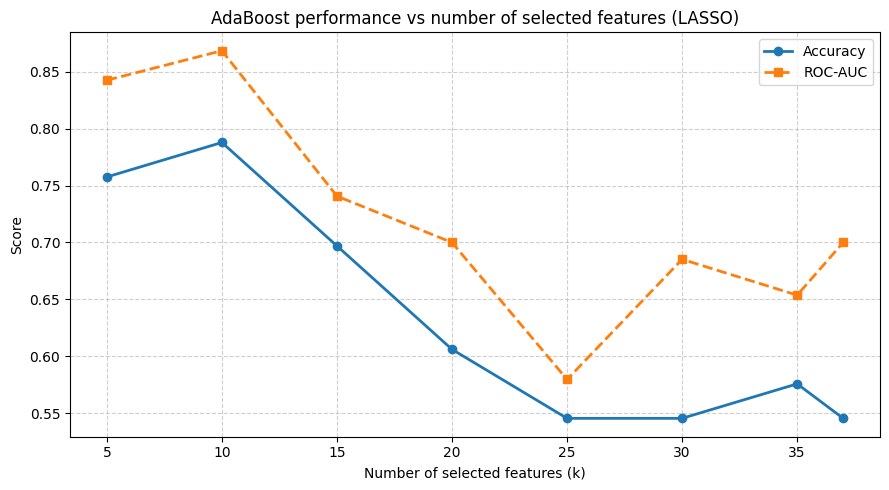

In [ ]:
results = np.array(results)
feature_counts = results[:, 0]   
accuracies = results[:, 1]     
auc_scores = results[:, 2]      

plt.figure(figsize=(9,5))

plt.plot(feature_counts, accuracies, marker='o', linewidth=2,
         label='Accuracy')

plt.plot(feature_counts, auc_scores, marker='s', linewidth=2, linestyle='--',
         label='ROC-AUC')

plt.title("AdaBoost performance vs number of selected features (LASSO)")
plt.xlabel("Number of selected features (k)")
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# AdaBoost with lasso (4-15 features)

In [27]:
import warnings
warnings.filterwarnings("ignore")
param_dist = {
    'n_estimators': np.arange(100, 500, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'algorithm': [ 'SAMME.R']
}

k_values = list(range(4, 15, 1))

    
results = []

for k in k_values:
    print(f"\n=== Testing top-{k} LASSO features ===")
    
    selected_idx = sorted_nonzero[:k] 
    
    X_train_sel = X_train.iloc[:, selected_idx]
    X_test_sel  = X_test.iloc[:, selected_idx]


    ada = AdaBoostClassifier(random_state=42)
    
    search = RandomizedSearchCV(
        estimator=ada,
        param_distributions=param_dist,
        n_iter=20,
        scoring='roc_auc',
        cv=3,
        random_state=42
    )
    search.fit(X_train_sel, y_train)

    y_pred = search.best_estimator_.predict(X_test_sel)
    y_prob = search.best_estimator_.predict_proba(X_test_sel)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))

    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")



=== Testing top-4 LASSO features ===
Accuracy: 0.697 | ROC-AUC: 0.754

=== Testing top-5 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.843

=== Testing top-6 LASSO features ===
Accuracy: 0.788 | ROC-AUC: 0.819

=== Testing top-7 LASSO features ===
Accuracy: 0.788 | ROC-AUC: 0.824

=== Testing top-8 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.793

=== Testing top-9 LASSO features ===
Accuracy: 0.788 | ROC-AUC: 0.844

=== Testing top-10 LASSO features ===
Accuracy: 0.788 | ROC-AUC: 0.869

=== Testing top-11 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.856

=== Testing top-12 LASSO features ===
Accuracy: 0.667 | ROC-AUC: 0.737

=== Testing top-13 LASSO features ===
Accuracy: 0.697 | ROC-AUC: 0.737

=== Testing top-14 LASSO features ===
Accuracy: 0.697 | ROC-AUC: 0.741


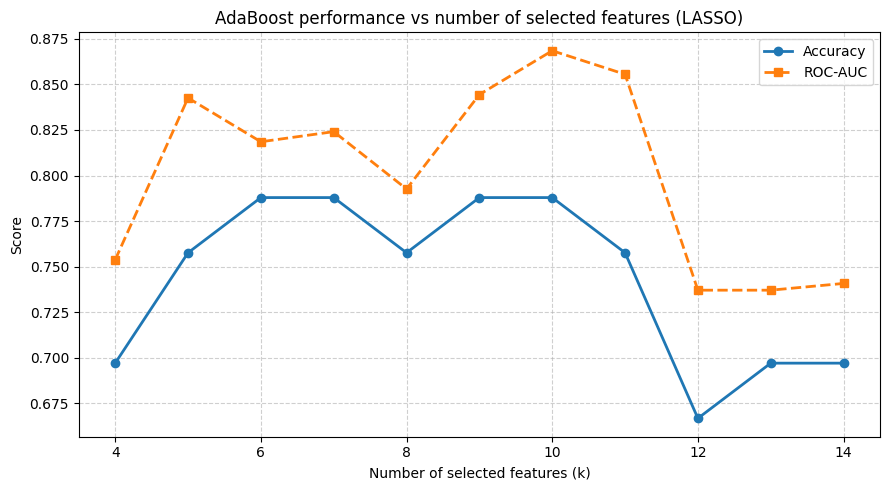

In [ ]:
results = np.array(results)
feature_counts = results[:, 0]   
accuracies = results[:, 1]     
auc_scores = results[:, 2]      

plt.figure(figsize=(9,5))

plt.plot(feature_counts, accuracies, marker='o', linewidth=2,
         label='Accuracy')

plt.plot(feature_counts, auc_scores, marker='s', linewidth=2, linestyle='--',
         label='ROC-AUC')

plt.title("AdaBoost performance vs number of selected features (LASSO)")
plt.xlabel("Number of selected features (k)")
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# GradientBoost with lasso

In [31]:
import warnings
warnings.filterwarnings("ignore")
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

k_values = list(range(5, max_k, 5))

if max_k not in k_values:
    k_values.append(max_k)
    
results = []

for k in k_values:
    print(f"\n=== Testing top-{k} LASSO features ===")
    
    selected_idx = sorted_nonzero[:k] 
    
    X_train_sel = X_train.iloc[:, selected_idx]
    X_test_sel  = X_test.iloc[:, selected_idx]


    model = GradientBoostingClassifier(random_state=42)
    
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=40,
        scoring='roc_auc',
        cv=3,
        random_state=42
    )
    search.fit(X_train_sel, y_train)

    y_pred = search.best_estimator_.predict(X_test_sel)
    y_prob = search.best_estimator_.predict_proba(X_test_sel)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))

    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")



=== Testing top-5 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.841

=== Testing top-10 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.800

=== Testing top-15 LASSO features ===
Accuracy: 0.606 | ROC-AUC: 0.652

=== Testing top-20 LASSO features ===
Accuracy: 0.545 | ROC-AUC: 0.607

=== Testing top-25 LASSO features ===
Accuracy: 0.667 | ROC-AUC: 0.737

=== Testing top-30 LASSO features ===
Accuracy: 0.606 | ROC-AUC: 0.678

=== Testing top-35 LASSO features ===
Accuracy: 0.606 | ROC-AUC: 0.689

=== Testing top-37 LASSO features ===
Accuracy: 0.485 | ROC-AUC: 0.622


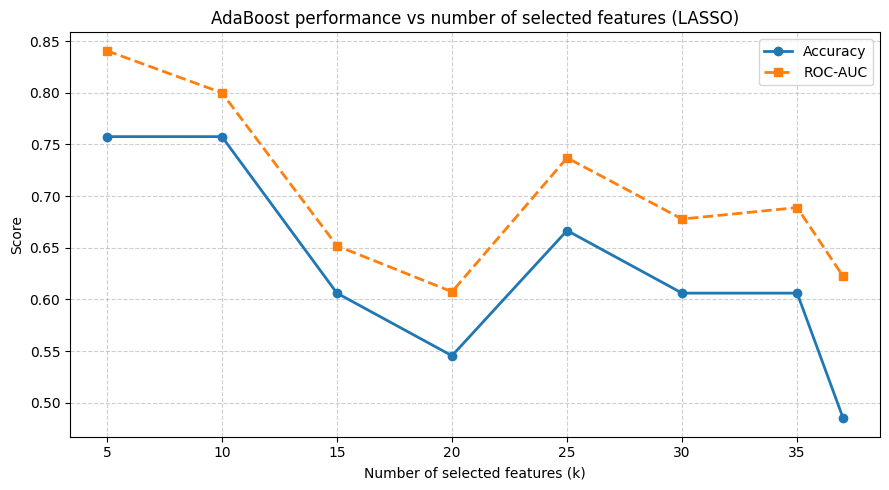

In [ ]:
results = np.array(results)
feature_counts = results[:, 0]   
accuracies = results[:, 1]     
auc_scores = results[:, 2]      

plt.figure(figsize=(9,5))

plt.plot(feature_counts, accuracies, marker='o', linewidth=2,
         label='Accuracy')

plt.plot(feature_counts, auc_scores, marker='s', linewidth=2, linestyle='--',
         label='ROC-AUC')

plt.title("AdaBoost performance vs number of selected features (LASSO)")
plt.xlabel("Number of selected features (k)")
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


# GradientBoost with lasso (4-15 features)

In [33]:
import warnings
warnings.filterwarnings("ignore")
param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [2, 3, 4],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

k_values = list(range(4, 15, 1))
results = []

for k in k_values:
    print(f"\n=== Testing top-{k} LASSO features ===")
    
    selected_idx = sorted_nonzero[:k] 
    
    X_train_sel = X_train.iloc[:, selected_idx]
    X_test_sel  = X_test.iloc[:, selected_idx]


    model = GradientBoostingClassifier(random_state=42)
    
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=40,
        scoring='roc_auc',
        cv=3,
        random_state=42
    )
    search.fit(X_train_sel, y_train)

    y_pred = search.best_estimator_.predict(X_test_sel)
    y_prob = search.best_estimator_.predict_proba(X_test_sel)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)
    results.append((k, acc, auc))

    print(f"Accuracy: {acc:.3f} | ROC-AUC: {auc:.3f}")



=== Testing top-4 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.774

=== Testing top-5 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.841

=== Testing top-6 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.848

=== Testing top-7 LASSO features ===
Accuracy: 0.697 | ROC-AUC: 0.785

=== Testing top-8 LASSO features ===
Accuracy: 0.727 | ROC-AUC: 0.811

=== Testing top-9 LASSO features ===
Accuracy: 0.727 | ROC-AUC: 0.807

=== Testing top-10 LASSO features ===
Accuracy: 0.758 | ROC-AUC: 0.800

=== Testing top-11 LASSO features ===
Accuracy: 0.818 | ROC-AUC: 0.804

=== Testing top-12 LASSO features ===
Accuracy: 0.636 | ROC-AUC: 0.674

=== Testing top-13 LASSO features ===
Accuracy: 0.667 | ROC-AUC: 0.670

=== Testing top-14 LASSO features ===
Accuracy: 0.636 | ROC-AUC: 0.693


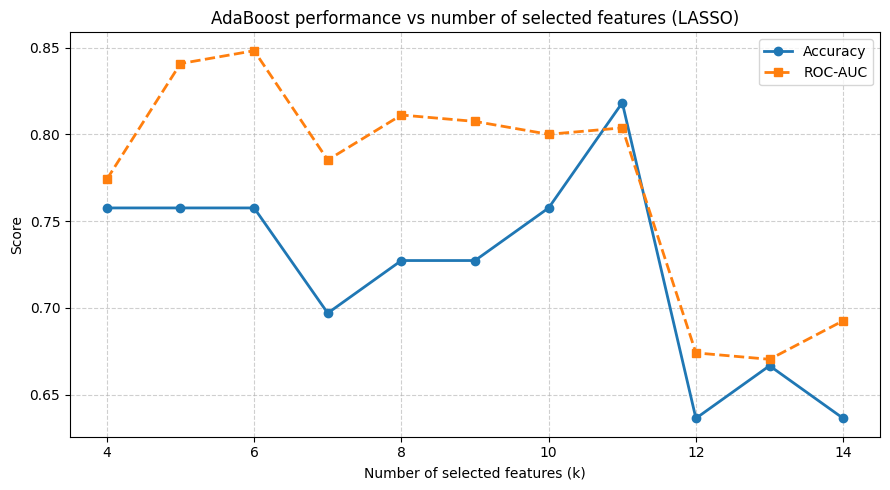

In [ ]:
results = np.array(results)
feature_counts = results[:, 0]   
accuracies = results[:, 1]     
auc_scores = results[:, 2]      

plt.figure(figsize=(9,5))

plt.plot(feature_counts, accuracies, marker='o', linewidth=2,
         label='Accuracy')

plt.plot(feature_counts, auc_scores, marker='s', linewidth=2, linestyle='--',
         label='ROC-AUC')

plt.title("AdaBoost performance vs number of selected features (LASSO)")
plt.xlabel("Number of selected features (k)")
plt.ylabel("Score")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()
